# Project Title:Student grades prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('Grade.csv')

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
df.shape

(571, 43)

In [8]:
df.isnull()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [10]:
df.isnull().sum().sum()

425

Here 425 null value present

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

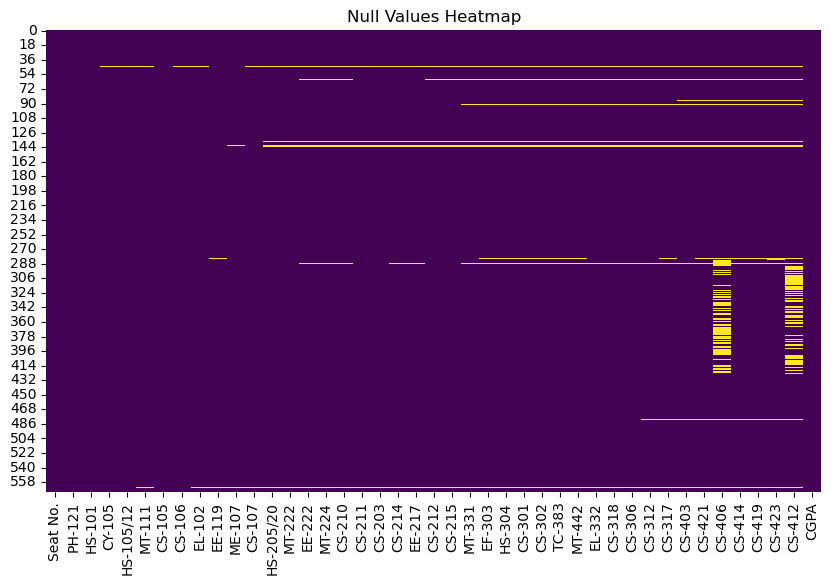

In [12]:
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

# Remove null value

In [13]:
df.replace(np.nan,0, inplace = True)


In [14]:
df.isnull().sum().sum()

0

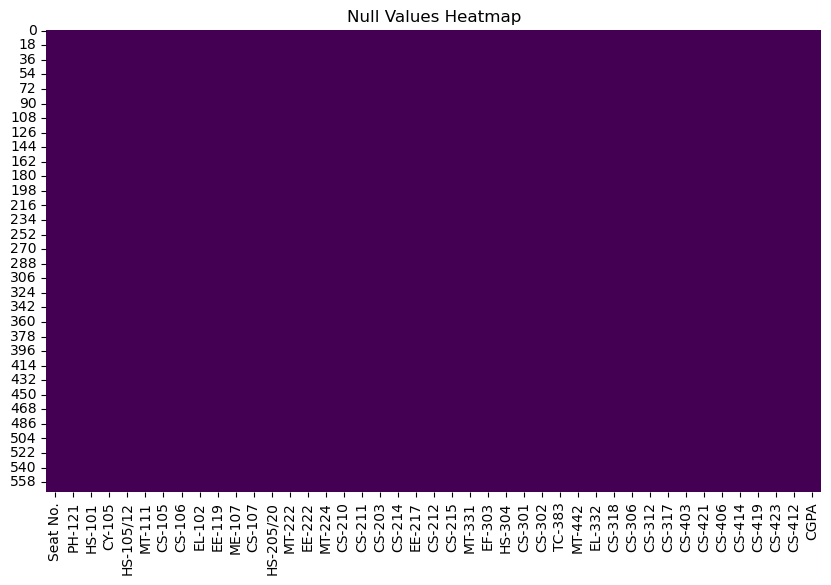

In [15]:
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

# here No null value present.

# split data

In [16]:
X = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412","CS-317", 'MT-442',"Seat No.","CGPA"], axis=1)
Y = df[["CGPA"]]


In [17]:
Y.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


# encoding grades

In [18]:
unique_values = df['EE-119'].unique()

In [19]:
unique_values

array(['B-', 'D+', 'A-', 'D', 'A', 'B+', 'B', 'C-', 'C+', 'C', 'WU', 0,
       'A+'], dtype=object)

In [20]:
new_encgrades={'A+':5,'A':4,'A-':3.7,'B+':3.4,'B':3.0,'B-':2.7, 'C+':2.4,'C':2.0,'C-':1.7,'D+':1.4,'D':1.0,'WU':0.0, 'F':0.0,'W':0,'I':0 }

In [21]:
for column in X.columns:
    X[column] = X[column].replace(new_encgrades)
    
X.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.4,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7


In [22]:
df = pd.concat([X, Y], axis=1)


In [23]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,5.0,4.0,3.7,3.7,5.0,3.4,...,3.0,3.7,3.7,4.0,5.0,4.0,4.0,3.4,3.7,3.798
567,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,5.0,3.7,3.4,3.772
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.0,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.470
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,2.193


# Visualizatuion

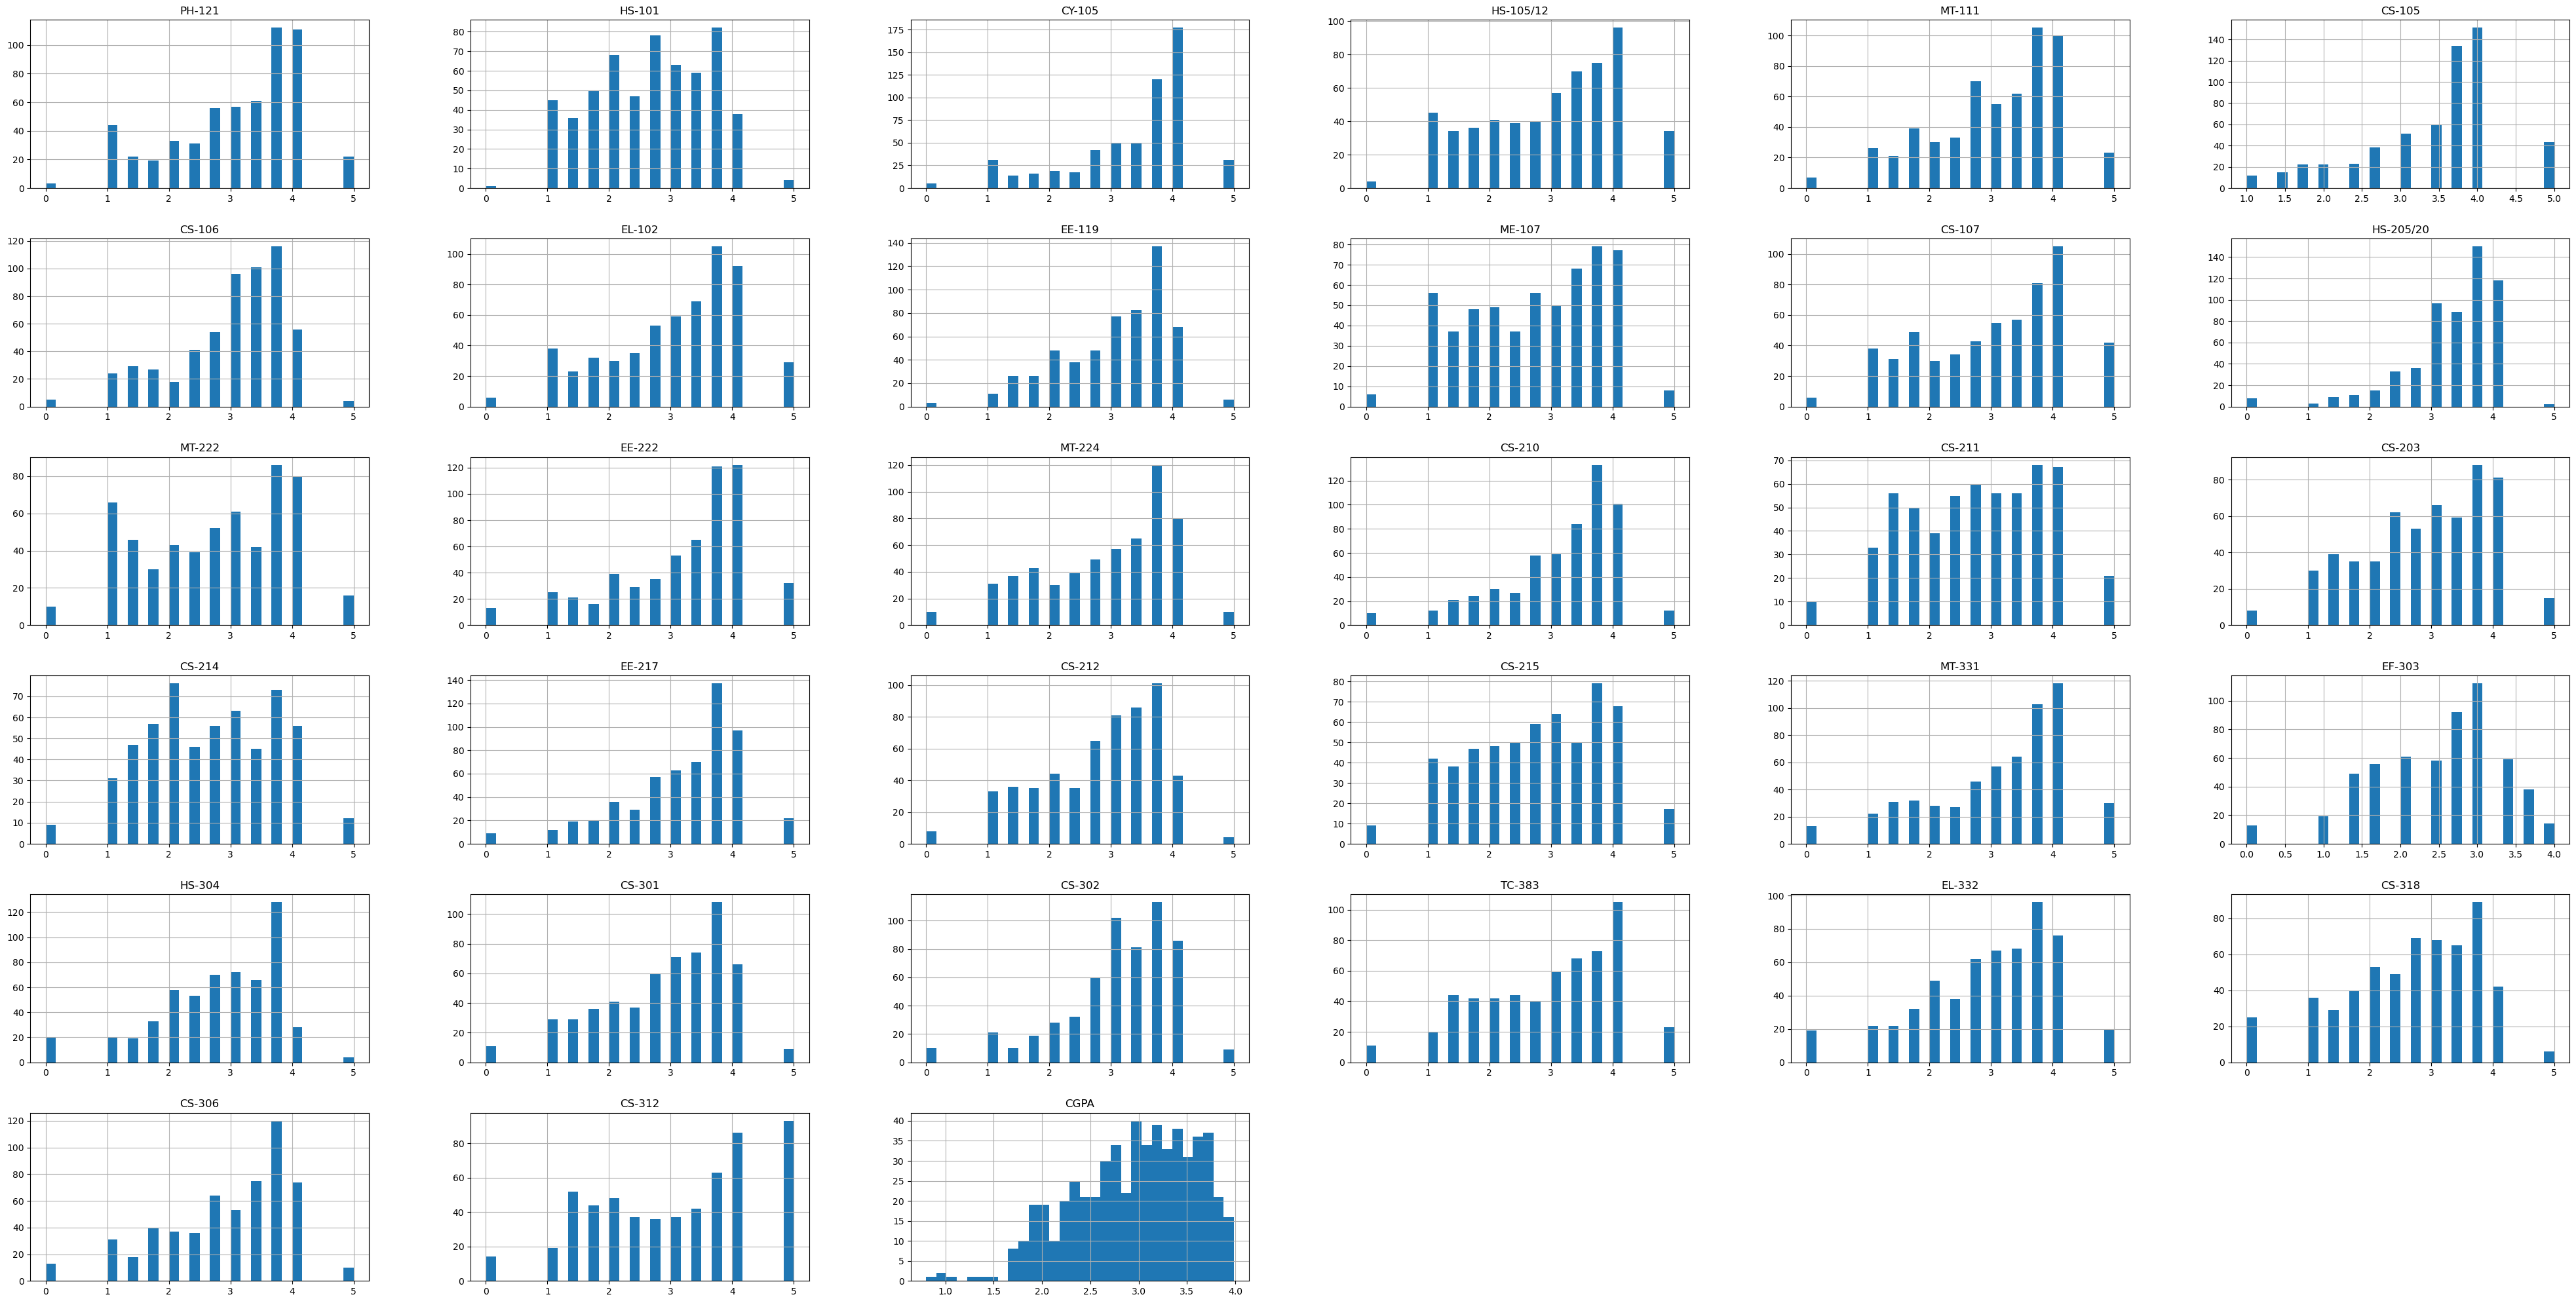

In [24]:
df.hist(bins=30,figsize=(50,25))
plt.show()
     

# Correlation

<AxesSubplot:>

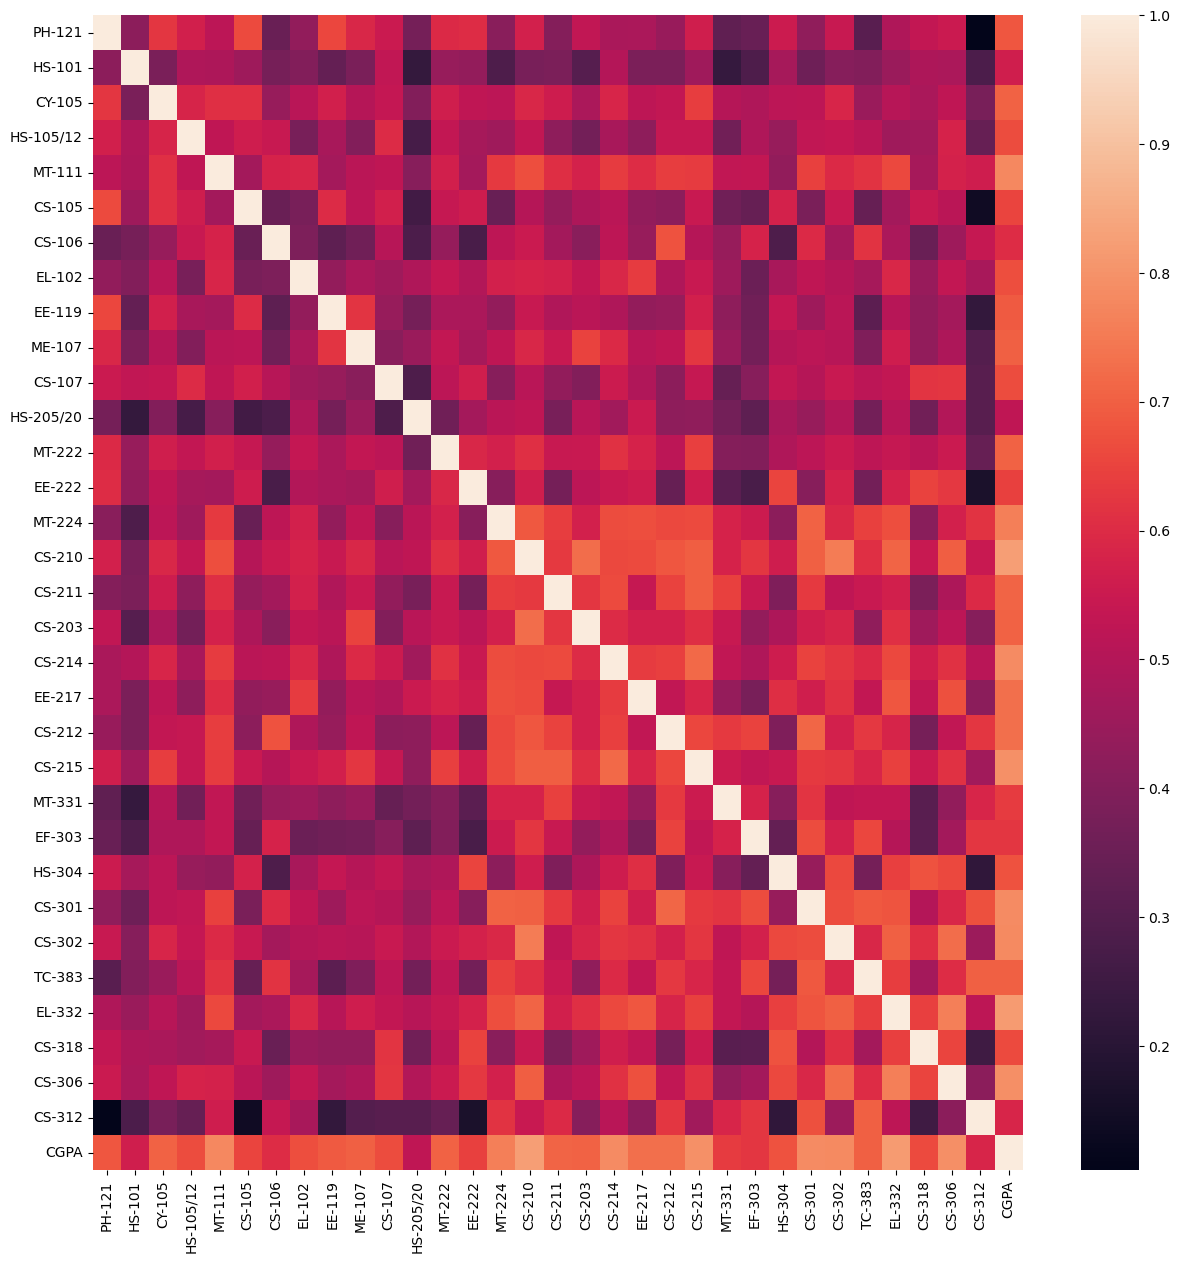

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [26]:
df.describe()
     

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.056918,2.635377,3.316988,2.938529,3.028371,3.404553,2.969002,3.020665,3.030648,2.712609,...,2.496673,2.768651,2.866550,3.065849,2.914011,2.898774,2.638879,2.909632,3.055166,2.954888
std,1.028045,0.922720,1.001057,1.108431,1.015460,0.900378,0.881527,1.056788,0.857755,1.053506,...,0.838382,0.968367,0.996829,0.902709,1.078895,1.064358,1.054012,1.017856,1.303095,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.000000,2.700000,2.000000,2.000000,2.000000,2.400000,2.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,2.700000,3.000000,3.000000,3.400000,3.000000,3.000000,2.700000,3.000000,3.000000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.000000,3.700000,3.700000,3.700000,3.700000,3.700000,3.400000,3.700000,4.000000,3.451000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.985000


In [27]:
df.to_csv('new_grade.csv')
     

In [28]:
model1_columns = []
model2_columns = []
model3_columns = []

for item in X:
    for i in X:
        if i[3] == '1':
            model1_columns.append(i)
        elif i[3] == '2':
            model2_columns.append(i)
        else:
            model3_columns.append(i)

# Combine the lists
model2_columns += model1_columns
model3_columns += model2_columns


# Linear Regression:


# Model 1: CGPA for first year only.

In [29]:
Y = df['CGPA'].values
features = df[list(model1_columns)].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.30)

In [31]:
# Bulid a new Model
lr_1 = linear_model.LinearRegression()

# Train the Model
lr_1.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict for training set
y_train_predict = lr_1.predict(X_train)

# Predict for training set
y_test_predict = lr_1.predict(X_test)


In [33]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_1.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.23849551196248023
MAE is 0.1831513848293097
---------------------------------------
The model performance for testing set
RMSE is 0.23471894330251944
MAE is 0.1906642724037337
---------------------------------------
The score of model for testing set
Test score 0.82


In [34]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.573,3.843876
1,3.651,3.583133
2,3.583,3.611942
3,2.995,2.973514
4,1.804,2.066532
...,...,...
167,2.384,2.435184
168,3.023,3.007938
169,2.408,2.617313
170,2.891,3.050907


# Model 2: Predict final CGPA based on GPs of first two years.

In [35]:
features = df[list(model2_columns)].values
     

In [36]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.30)

In [37]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_2 = linear_model.LinearRegression()

# Train the Model
lr_2.fit(X_train, y_train)

LinearRegression()

In [38]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_2.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.8813477980811684
MAE is 0.7099607246757342
---------------------------------------
The model performance for testing set
RMSE is 0.7846675821488183
MAE is 0.6275820216733468
---------------------------------------
The score of model for testing set
Test score 0.83


# Model 3: Predict final CGPA based on GPs of first three years.

In [48]:
features = df[list(model3_columns)].values

In [49]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.30)
     

# Build a Model

In [50]:
from sklearn import linear_model

# Bulid a new Model
lr_3 = linear_model.LinearRegression()

# Train the Model
lr_3.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict for training set
y_train_predict = lr_3.predict(X_train)

# Predict for training set
y_test_predict = lr_3.predict(X_test)

In [52]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) 
mae_test = mean_absolute_error(y_test, y_test_predict) 
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_3.score(X_test, y_test) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.13322794439132196
MAE is 0.08492359363153562
---------------------------------------
The model performance for testing set
RMSE is 0.1666963776042515
MAE is 0.10271365436973597
---------------------------------------
The score of model for testing set
Test score 0.93


Model 3 performs the best among the three models. It has the lowest RMSE and MAE values in both the training and testing sets, indicating that it provides the most accurate predictions. The high test score of 0.93 suggests that Model 3 explains a significant portion of the variance in the data and is a good fit for the given problem.

In summary, Model 3 is the preferred model for predicting CGPA based on the first-year data, as it exhibits the lowest errors and the highest test score. Models 1 and 2 also provide acceptable performance but with slightly higher errors and lower test scores.

# Random Forest:

# Model 1: Predict final CGPA based on GPs of first year only.

In [53]:
# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values
     

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_1.fit(X_train, y_train)
y_pred = rf_1.predict(X_test)
     

In [56]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_1.score(X_test, y_test))


Mean Absolute Error: 0.20188826086956524
Mean Squared Error: 0.06045656963043478
Root Mean Squared Error: 0.24587917689473987
The score of model for testing set 0.8261589216853384


# Model 2: Predict final CGPA based on GPs of first two years.

In [60]:
# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_2 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_2.fit(X_train, y_train)
y_pred = rf_2.predict(X_test)

In [63]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_2.score(X_test, y_test))

Mean Absolute Error: 0.12744434782608702
Mean Squared Error: 0.027733036130434794
Root Mean Squared Error: 0.16653238763206032
The score of model for testing set 0.9202544746530373


# Model 3: Predict final CGPA based first Three year only

In [64]:
features = df[list(model3_columns)].values

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_3 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_3.fit(X_train, y_train)
y_pred = rf_3.predict(X_test)

In [67]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_3.score(X_test, y_test))

Mean Absolute Error: 0.09849086956521744
Mean Squared Error: 0.018132661586956523
Root Mean Squared Error: 0.1346575715916358
The score of model for testing set 0.9478600677765796


Model 3 performs the best among the three models. It has the lowest MAE, MSE, and RMSE values, indicating that it provides the most accurate predictions. The high test score of 0.9479 suggests that Model 3 explains a substantial portion of the variance in the data and is a good fit for the given problem.

In summary, Model 3 is the preferred Random Forest model for this task, as it exhibits the lowest errors and the highest test score. Models 1 and 2 also provide acceptable performance, but Model 3 stands out as the best performer in terms of predictive accuracy.

In [70]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
from sklearn.metrics import r2_score  # Import the r2_score function


# Calculate R-squared for the best model
r2_test_best = r2_score(y_test, y_test_predict_best)


# Get the best hyperparameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions with the best model
y_test_predict_best = best_estimator.predict(X_test)

# Evaluate the best model
mse_test_best = mean_squared_error(y_test, y_test_predict_best)
mae_test_best = mean_absolute_error(y_test, y_test_predict_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_test_best = r2_score(y_test, y_test_predict_best)

# Print the evaluation results for the best model
print("Best Model performance on testing set:")
print("RMSE: {:.4f}".format(rmse_test_best))
print("MAE: {:.4f}".format(mae_test_best))
print("R-squared (R^2) Score: {:.4f}".format(r2_test_best))


Best Hyperparameters:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model performance on testing set:
RMSE: 0.1062
MAE: 0.0769
R-squared (R^2) Score: 0.9675


These results indicate that this specific model, which appears to be a Random Forest model based on the hyperparameters provided, is performing very well on the testing set. The high R-squared score of 0.9675 suggests that the model explains a significant portion of the variance in the target variable. Additionally, the low RMSE and MAE values indicate accurate predictions.

Overall, this model seems to be a strong performer for the given task, and it has been well-tuned with appropriate hyperparameters.